In [ ]:
import pandas as pd

df = pd.read_csv("DENGBR25.csv", low_memory=False)
df.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,2025-11-26,202548,2025,15,150555,1495.0,2615975.0,2025-11-18,...,NaN,NaN,NaN,NaN,2.0,NaN,2025-11-28,0.0,NaN,NaN
1,2,A90,2025-11-26,202548,2025,15,150555,1495.0,2615975.0,2025-11-26,...,NaN,NaN,NaN,NaN,2.0,NaN,2025-11-28,0.0,NaN,NaN
2,2,A90,2025-12-08,202550,2025,15,150555,1495.0,2615975.0,2025-12-07,...,NaN,NaN,NaN,NaN,2.0,NaN,2025-12-12,0.0,NaN,NaN
3,2,A90,2025-12-08,202550,2025,15,150555,1495.0,2615975.0,2025-12-07,...,NaN,NaN,NaN,NaN,2.0,NaN,2025-12-12,0.0,NaN,NaN
4,2,A90,2025-12-08,202550,2025,15,150555,1495.0,2615975.0,2025-12-07,...,NaN,NaN,NaN,NaN,2.0,NaN,2025-12-12,0.0,NaN,NaN


In [ ]:
# Quantidade de linhas e colunas
df.shape

(1622438, 121)

In [ ]:
# Remover colunas irrelevantes ou com muitos valores ausentes

drop_cols = [
    "tp_", "id_", "cod", "nu_", "co_",
    "dt_", "uf", "municip", "pais",
    "notific", "digita", "atualiza",
    "sistema", "fluxo", "origem",
    "migr", "versao", "status",
    "lote", "usuario", "login", "sem_", "cs_escol_n", 
    "hospitaliz", "comuninf", "evolucao", "doenca_tra", 
    "nduplic_n", "cs_flxret", "flxrecebi", "tpautocto"
]

def is_to_remove(col_name):
    col_name = col_name.lower()
    return any(word in col_name for word in drop_cols)


cols_to_drop = [col for col in df.columns if is_to_remove(col)]

print(f"Quantidade de colunas removida: {len(cols_to_drop)}")
print(f"Colunas removidas: {cols_to_drop}")

df = df.drop(columns=cols_to_drop)
print("Dimensão após limpeza:", df.shape)

Quantidade de colunas removida: 48
Colunas removidas: ['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI', 'SEM_PRI', 'NU_IDADE_N', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N', 'DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'DT_SORO', 'DT_NS1', 'DT_VIRAL', 'DT_PCR', 'HOSPITALIZ', 'DT_INTERNA', 'UF', 'MUNICIPIO', 'TPAUTOCTO', 'COUFINF', 'COPAISINF', 'COMUNINF', 'DOENCA_TRA', 'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'DT_ALRM', 'GRAV_INSUF', 'DT_GRAV', 'LACO_N', 'TP_SISTEMA', 'NDUPLIC_N', 'DT_DIGITA', 'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W']
Dimensão após limpeza: (1622438, 73)


In [ ]:
print("Colunas restantes:", df.columns.tolist())

Colunas restantes: ['ANO_NASC', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'RESUL_SORO', 'RESUL_NS1', 'RESUL_VI_N', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'CLASSI_FIN', 'CRITERIO', 'CLINC_CHIK', 'ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ', 'GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_TAQUI', 'GRAV_EXTRE', 'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST', 'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO', 'MANI_HEMOR', 'EPISTAXE', 'GENGIVO', 'METRO', 'PETEQUIAS', 'HEMATURA', 'SANGRAM', 'PLASMATICO', 'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD', 'COMPLICA']


In [ ]:
# Quantidade de nulos em cada coluna
df.isnull().sum()

ANO_NASC         4628
CS_SEXO             1
CS_GESTANT        176
CS_RACA             2
FEBRE           67114
               ...   
PLASMATICO    1622438
EVIDENCIA     1622438
PLAQ_MENOR    1622438
CON_FHD       1622438
COMPLICA      1622438
Length: 73, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622438 entries, 0 to 1622437
Data columns (total 73 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ANO_NASC    1617810 non-null  float64
 1   CS_SEXO     1622437 non-null  object 
 2   CS_GESTANT  1622262 non-null  float64
 3   CS_RACA     1622436 non-null  float64
 4   FEBRE       1555324 non-null  float64
 5   MIALGIA     1555324 non-null  float64
 6   CEFALEIA    1555324 non-null  float64
 7   EXANTEMA    1555324 non-null  float64
 8   VOMITO      1555324 non-null  float64
 9   NAUSEA      1555324 non-null  float64
 10  DOR_COSTAS  1555324 non-null  float64
 11  CONJUNTVIT  1555324 non-null  float64
 12  ARTRITE     1555324 non-null  float64
 13  ARTRALGIA   1555324 non-null  float64
 14  PETEQUIA_N  1555324 non-null  float64
 15  LEUCOPENIA  1555324 non-null  float64
 16  LACO        1555324 non-null  float64
 17  DOR_RETRO   1555324 non-null  float64
 18  DIABETES    1555324 no

In [ ]:
# Calcula a proporção de valores nulos por coluna
null_ratio = df.isnull().mean()

null_ratio.sort_values(ascending=False)

PLASMATICO    1.000000e+00
MANI_HEMOR    1.000000e+00
EPISTAXE      1.000000e+00
GENGIVO       1.000000e+00
METRO         1.000000e+00
                  ...     
CLASSI_FIN    2.752463e-02
ANO_NASC      2.852497e-03
CS_GESTANT    1.084787e-04
CS_RACA       1.232713e-06
CS_SEXO       6.163564e-07
Length: 73, dtype: float64

In [ ]:
# Remover colunas com mais de 90% de valores nulos

df = df.loc[:, df.isnull().mean() < 0.9]

print("Após remoção por nulos:", df.shape)

Após remoção por nulos: (1622438, 33)


In [ ]:
# Calcula a proporção de valores nulos por coluna
null_ratio = df.isnull().sum()

null_ratio.sort_values(ascending=False)

HISTOPA_N     947377
IMUNOH_N      947209
RESUL_VI_N    874253
RESUL_PCR_    839167
RESUL_SORO    710661
RESUL_NS1     581436
CRITERIO      199066
AUTO_IMUNE     67114
FEBRE          67114
ARTRALGIA      67114
EXANTEMA       67114
CEFALEIA       67114
MIALGIA        67114
VOMITO         67114
CONJUNTVIT     67114
DOR_COSTAS     67114
NAUSEA         67114
HEPATOPAT      67114
ACIDO_PEPT     67114
HIPERTENSA     67114
LACO           67114
ARTRITE        67114
LEUCOPENIA     67114
PETEQUIA_N     67114
DOR_RETRO      67114
DIABETES       67114
HEMATOLOG      67114
RENAL          67114
CLASSI_FIN     44657
ANO_NASC        4628
CS_GESTANT       176
CS_RACA            2
CS_SEXO            1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622438 entries, 0 to 1622437
Data columns (total 33 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ANO_NASC    1617810 non-null  float64
 1   CS_SEXO     1622437 non-null  object 
 2   CS_GESTANT  1622262 non-null  float64
 3   CS_RACA     1622436 non-null  float64
 4   FEBRE       1555324 non-null  float64
 5   MIALGIA     1555324 non-null  float64
 6   CEFALEIA    1555324 non-null  float64
 7   EXANTEMA    1555324 non-null  float64
 8   VOMITO      1555324 non-null  float64
 9   NAUSEA      1555324 non-null  float64
 10  DOR_COSTAS  1555324 non-null  float64
 11  CONJUNTVIT  1555324 non-null  float64
 12  ARTRITE     1555324 non-null  float64
 13  ARTRALGIA   1555324 non-null  float64
 14  PETEQUIA_N  1555324 non-null  float64
 15  LEUCOPENIA  1555324 non-null  float64
 16  LACO        1555324 non-null  float64
 17  DOR_RETRO   1555324 non-null  float64
 18  DIABETES    1555324 no

In [ ]:
import numpy as np

# Criando dataframe somente com nossas variáveis numericas
df_numerico = df.select_dtypes([np.number])
# Calcula a matriz de correlação
correlation_matrix = df_numerico.corr()
correlation_matrix

,ANO_NASC,CS_GESTANT,CS_RACA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,...,ACIDO_PEPT,AUTO_IMUNE,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO
ANO_NASC,1.000000,0.029100,0.037233,-0.129265,0.096123,0.013862,-0.044029,-0.087967,0.019878,0.089237,...,0.012959,0.032706,0.070225,0.054593,0.016202,0.041604,-0.006565,-0.007453,-0.070248,0.089977
CS_GESTANT,0.029100,1.000000,0.239733,-0.003789,0.039075,0.049546,0.017785,0.027906,0.069819,0.082557,...,0.001049,0.010712,0.028441,-0.024579,0.017108,0.036671,0.002363,0.000102,-0.014628,0.013596
CS_RACA,0.037233,0.239733,1.000000,0.011430,0.048561,0.056420,0.027463,0.025064,0.089002,0.109251,...,-0.000661,0.010427,0.031778,0.002678,0.014022,0.027704,-0.007672,-0.009877,-0.035107,0.024171
FEBRE,-0.129265,-0.003789,0.011430,1.000000,0.140423,0.149805,0.030141,0.041909,0.036286,0.049506,...,0.000230,-0.001869,-0.078006,-0.052648,0.005673,0.016428,-0.000731,-0.003073,-0.018506,-0.070437
MIALGIA,0.096123,0.039075,0.048561,0.140423,1.000000,0.253542,0.009793,-0.038174,0.067914,0.086776,...,0.001894,0.004344,-0.054321,-0.076685,0.010729,0.010252,-0.001604,-0.001539,-0.026347,-0.050899
CEFALEIA,0.013862,0.049546,0.056420,0.149805,0.253542,1.000000,-0.009421,0.014902,0.121762,0.160431,...,0.002556,0.003031,-0.049296,-0.070046,0.007696,-0.001545,-0.001086,-0.001463,-0.015847,-0.059005
EXANTEMA,-0.044029,0.017785,0.027463,0.030141,0.009793,-0.009421,1.000000,0.054719,0.044689,0.064934,...,0.018507,0.016721,0.058603,-0.013518,-0.004062,0.005991,0.000206,-0.000893,0.001677,0.018110
VOMITO,-0.087967,0.027906,0.025064,0.041909,-0.038174,0.014902,0.054719,1.000000,0.353530,0.083615,...,0.011128,0.010196,0.003680,-0.030967,0.001198,0.014654,0.006569,0.003961,-0.011025,-0.021253
NAUSEA,0.019878,0.069819,0.089002,0.036286,0.067914,0.121762,0.044689,0.353530,1.000000,0.236135,...,0.015685,0.021547,0.006902,-0.028560,0.006502,0.011983,0.000216,-0.002241,-0.041443,-0.004411
DOR_COSTAS,0.089237,0.082557,0.109251,0.049506,0.086776,0.160431,0.064934,0.083615,0.236135,1.000000,...,0.019707,0.030362,0.029803,-0.028881,0.001511,0.016913,0.002010,0.000690,-0.020658,0.005839


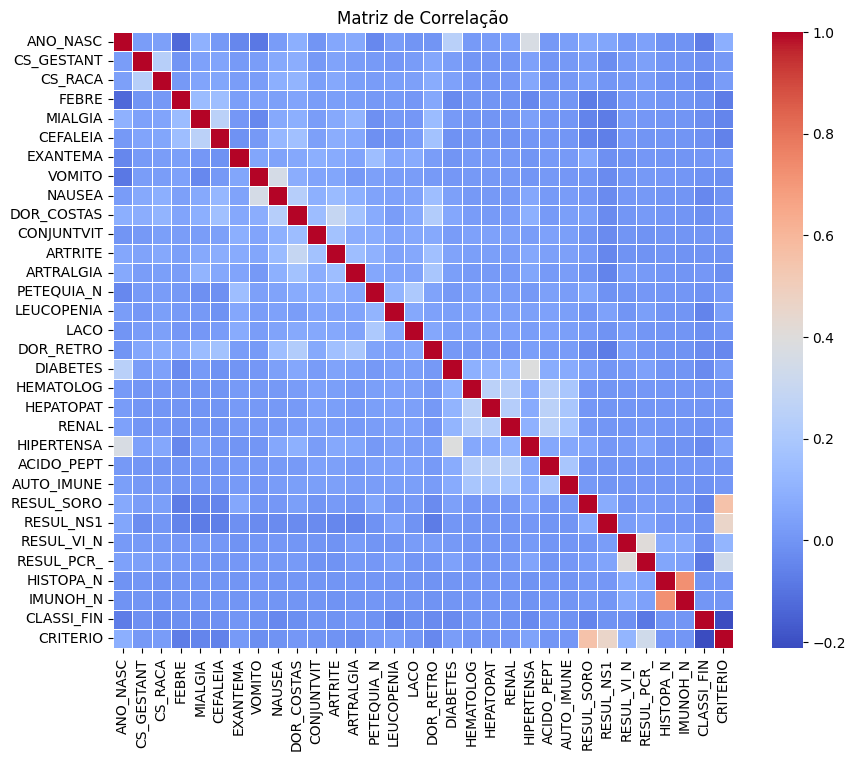

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
# Preenche os valores NaN com a mediana das colunas
imputer = SimpleImputer(missing_values= np.nan, strategy='median')
df_numerico = pd.DataFrame(imputer.fit_transform(df_numerico), columns=df_numerico.columns)

In [ ]:
df_numerico.isnull().sum() # Verifica se ainda há valores nulos

ANO_NASC      0
CS_GESTANT    0
CS_RACA       0
FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LEUCOPENIA    0
LACO          0
DOR_RETRO     0
DIABETES      0
HEMATOLOG     0
HEPATOPAT     0
RENAL         0
HIPERTENSA    0
ACIDO_PEPT    0
AUTO_IMUNE    0
RESUL_SORO    0
RESUL_NS1     0
RESUL_VI_N    0
RESUL_PCR_    0
HISTOPA_N     0
IMUNOH_N      0
CLASSI_FIN    0
CRITERIO      0
dtype: int64

In [ ]:
df_numerico.head()

,ANO_NASC,CS_GESTANT,CS_RACA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,...,ACIDO_PEPT,AUTO_IMUNE,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO
0,1938.0,6.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
1,1970.0,6.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
2,2005.0,6.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
3,2013.0,5.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
4,1977.0,5.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0


array([[<Axes: title={'center': 'ANO_NASC'}>,
        <Axes: title={'center': 'CS_GESTANT'}>,
        <Axes: title={'center': 'CS_RACA'}>,
        <Axes: title={'center': 'FEBRE'}>,
        <Axes: title={'center': 'MIALGIA'}>,
        <Axes: title={'center': 'CEFALEIA'}>],
       [<Axes: title={'center': 'EXANTEMA'}>,
        <Axes: title={'center': 'VOMITO'}>,
        <Axes: title={'center': 'NAUSEA'}>,
        <Axes: title={'center': 'DOR_COSTAS'}>,
        <Axes: title={'center': 'CONJUNTVIT'}>,
        <Axes: title={'center': 'ARTRITE'}>],
       [<Axes: title={'center': 'ARTRALGIA'}>,
        <Axes: title={'center': 'PETEQUIA_N'}>,
        <Axes: title={'center': 'LEUCOPENIA'}>,
        <Axes: title={'center': 'LACO'}>,
        <Axes: title={'center': 'DOR_RETRO'}>,
        <Axes: title={'center': 'DIABETES'}>],
       [<Axes: title={'center': 'HEMATOLOG'}>,
        <Axes: title={'center': 'HEPATOPAT'}>,
        <Axes: title={'center': 'RENAL'}>,
        <Axes: title={'center': 'H

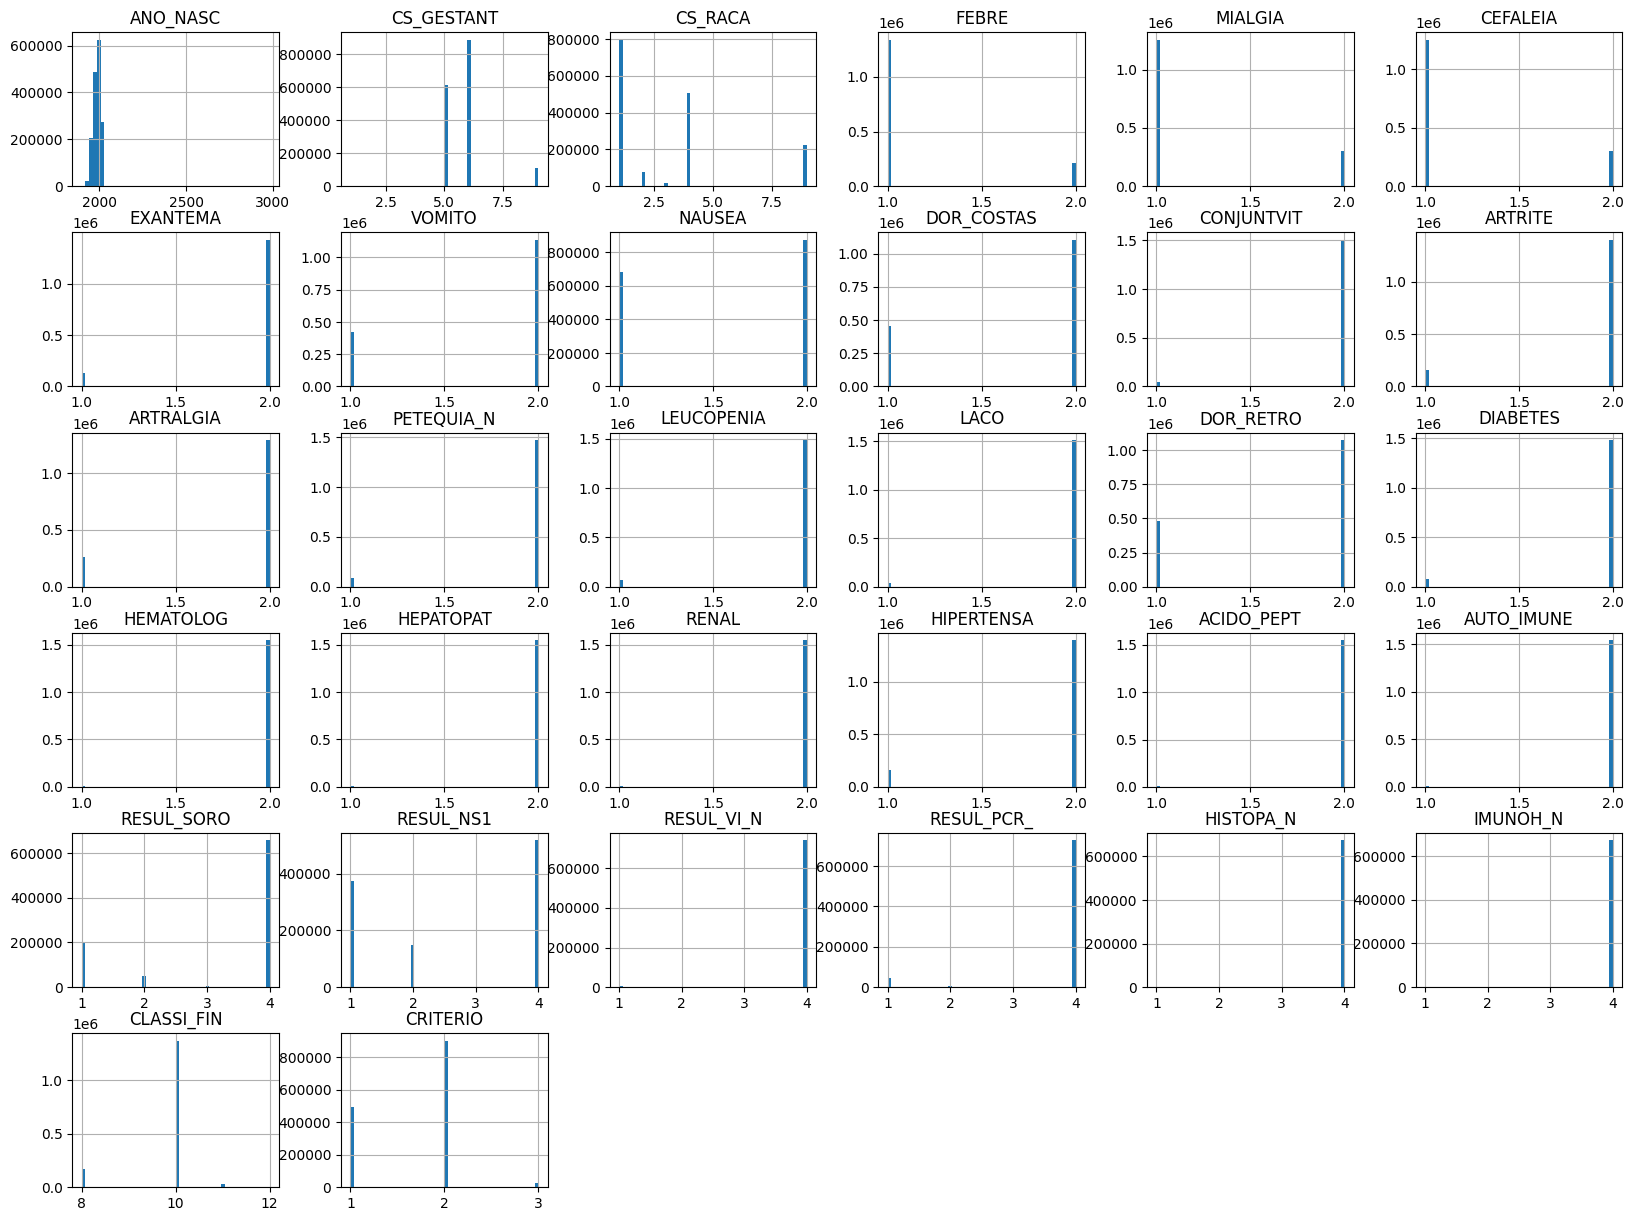

In [ ]:
# Analisando algumas distribuições com histogramas
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622438 entries, 0 to 1622437
Data columns (total 33 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ANO_NASC    1617810 non-null  float64
 1   CS_SEXO     1622437 non-null  object 
 2   CS_GESTANT  1622262 non-null  float64
 3   CS_RACA     1622436 non-null  float64
 4   FEBRE       1555324 non-null  float64
 5   MIALGIA     1555324 non-null  float64
 6   CEFALEIA    1555324 non-null  float64
 7   EXANTEMA    1555324 non-null  float64
 8   VOMITO      1555324 non-null  float64
 9   NAUSEA      1555324 non-null  float64
 10  DOR_COSTAS  1555324 non-null  float64
 11  CONJUNTVIT  1555324 non-null  float64
 12  ARTRITE     1555324 non-null  float64
 13  ARTRALGIA   1555324 non-null  float64
 14  PETEQUIA_N  1555324 non-null  float64
 15  LEUCOPENIA  1555324 non-null  float64
 16  LACO        1555324 non-null  float64
 17  DOR_RETRO   1555324 non-null  float64
 18  DIABETES    1555324 no

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar o rótulo 'CS_SEXO'
df['CS_SEXO'] = label_encoder.fit_transform(df['CS_SEXO'])

df.head()

,ANO_NASC,CS_SEXO,CS_GESTANT,CS_RACA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,...,ACIDO_PEPT,AUTO_IMUNE,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO
0,1938.0,2,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970.0,2,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005.0,2,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.0,0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1977.0,0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# tratamento de valores nulos nas colunas numéricas do dataframe original
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isnull().sum()

ANO_NASC      0
CS_SEXO       0
CS_GESTANT    0
CS_RACA       0
FEBRE         0
MIALGIA       0
CEFALEIA      0
EXANTEMA      0
VOMITO        0
NAUSEA        0
DOR_COSTAS    0
CONJUNTVIT    0
ARTRITE       0
ARTRALGIA     0
PETEQUIA_N    0
LEUCOPENIA    0
LACO          0
DOR_RETRO     0
DIABETES      0
HEMATOLOG     0
HEPATOPAT     0
RENAL         0
HIPERTENSA    0
ACIDO_PEPT    0
AUTO_IMUNE    0
RESUL_SORO    0
RESUL_NS1     0
RESUL_VI_N    0
RESUL_PCR_    0
HISTOPA_N     0
IMUNOH_N      0
CLASSI_FIN    0
CRITERIO      0
dtype: int64

In [ ]:
df.head()

,ANO_NASC,CS_SEXO,CS_GESTANT,CS_RACA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,...,ACIDO_PEPT,AUTO_IMUNE,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO
0,1938.0,2.0,6.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
1,1970.0,2.0,6.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
2,2005.0,2.0,6.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
3,2013.0,0.0,5.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0
4,1977.0,0.0,5.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,10.0,2.0


In [ ]:
df['NAUSEA'].value_counts(ascending=False)

NAUSEA
2.0    942180
1.0    680258
Name: count, dtype: int64

In [ ]:
# Filtra e mostra as primeiras 5 linhas onde NAUSEA é igual a 1
df.loc[df['NAUSEA'] < 2].head(5)

,ANO_NASC,CS_SEXO,CS_GESTANT,CS_RACA,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,...,ACIDO_PEPT,AUTO_IMUNE,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO
10,2009.0,2.0,6.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,8.0,2.0
12,1988.0,0.0,6.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,10.0,3.0
14,2002.0,0.0,5.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,10.0,3.0
16,2010.0,0.0,5.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,8.0,2.0
22,1958.0,0.0,5.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0,8.0,2.0


In [ ]:
df['ANO_NASC'].value_counts()

ANO_NASC
1999.0    30906
2000.0    30859
1990.0    30803
2005.0    30263
1997.0    30005
          ...  
2981.0        1
1909.0        1
1905.0        1
1907.0        1
1904.0        1
Name: count, Length: 125, dtype: int64

In [ ]:
# Removendo linhas com ANO_NASC igual a 2981

df = df[df['ANO_NASC'] != 2981]

df['ANO_NASC'].value_counts()

ANO_NASC
1999.0    30906
2000.0    30859
1990.0    30803
2005.0    30263
1997.0    30005
          ...  
1900.0        2
1909.0        1
1905.0        1
1907.0        1
1904.0        1
Name: count, Length: 124, dtype: int64

array([[<Axes: title={'center': 'ANO_NASC'}>,
        <Axes: title={'center': 'CS_SEXO'}>,
        <Axes: title={'center': 'CS_GESTANT'}>,
        <Axes: title={'center': 'CS_RACA'}>,
        <Axes: title={'center': 'FEBRE'}>,
        <Axes: title={'center': 'MIALGIA'}>],
       [<Axes: title={'center': 'CEFALEIA'}>,
        <Axes: title={'center': 'EXANTEMA'}>,
        <Axes: title={'center': 'VOMITO'}>,
        <Axes: title={'center': 'NAUSEA'}>,
        <Axes: title={'center': 'DOR_COSTAS'}>,
        <Axes: title={'center': 'CONJUNTVIT'}>],
       [<Axes: title={'center': 'ARTRITE'}>,
        <Axes: title={'center': 'ARTRALGIA'}>,
        <Axes: title={'center': 'PETEQUIA_N'}>,
        <Axes: title={'center': 'LEUCOPENIA'}>,
        <Axes: title={'center': 'LACO'}>,
        <Axes: title={'center': 'DOR_RETRO'}>],
       [<Axes: title={'center': 'DIABETES'}>,
        <Axes: title={'center': 'HEMATOLOG'}>,
        <Axes: title={'center': 'HEPATOPAT'}>,
        <Axes: title={'center': 

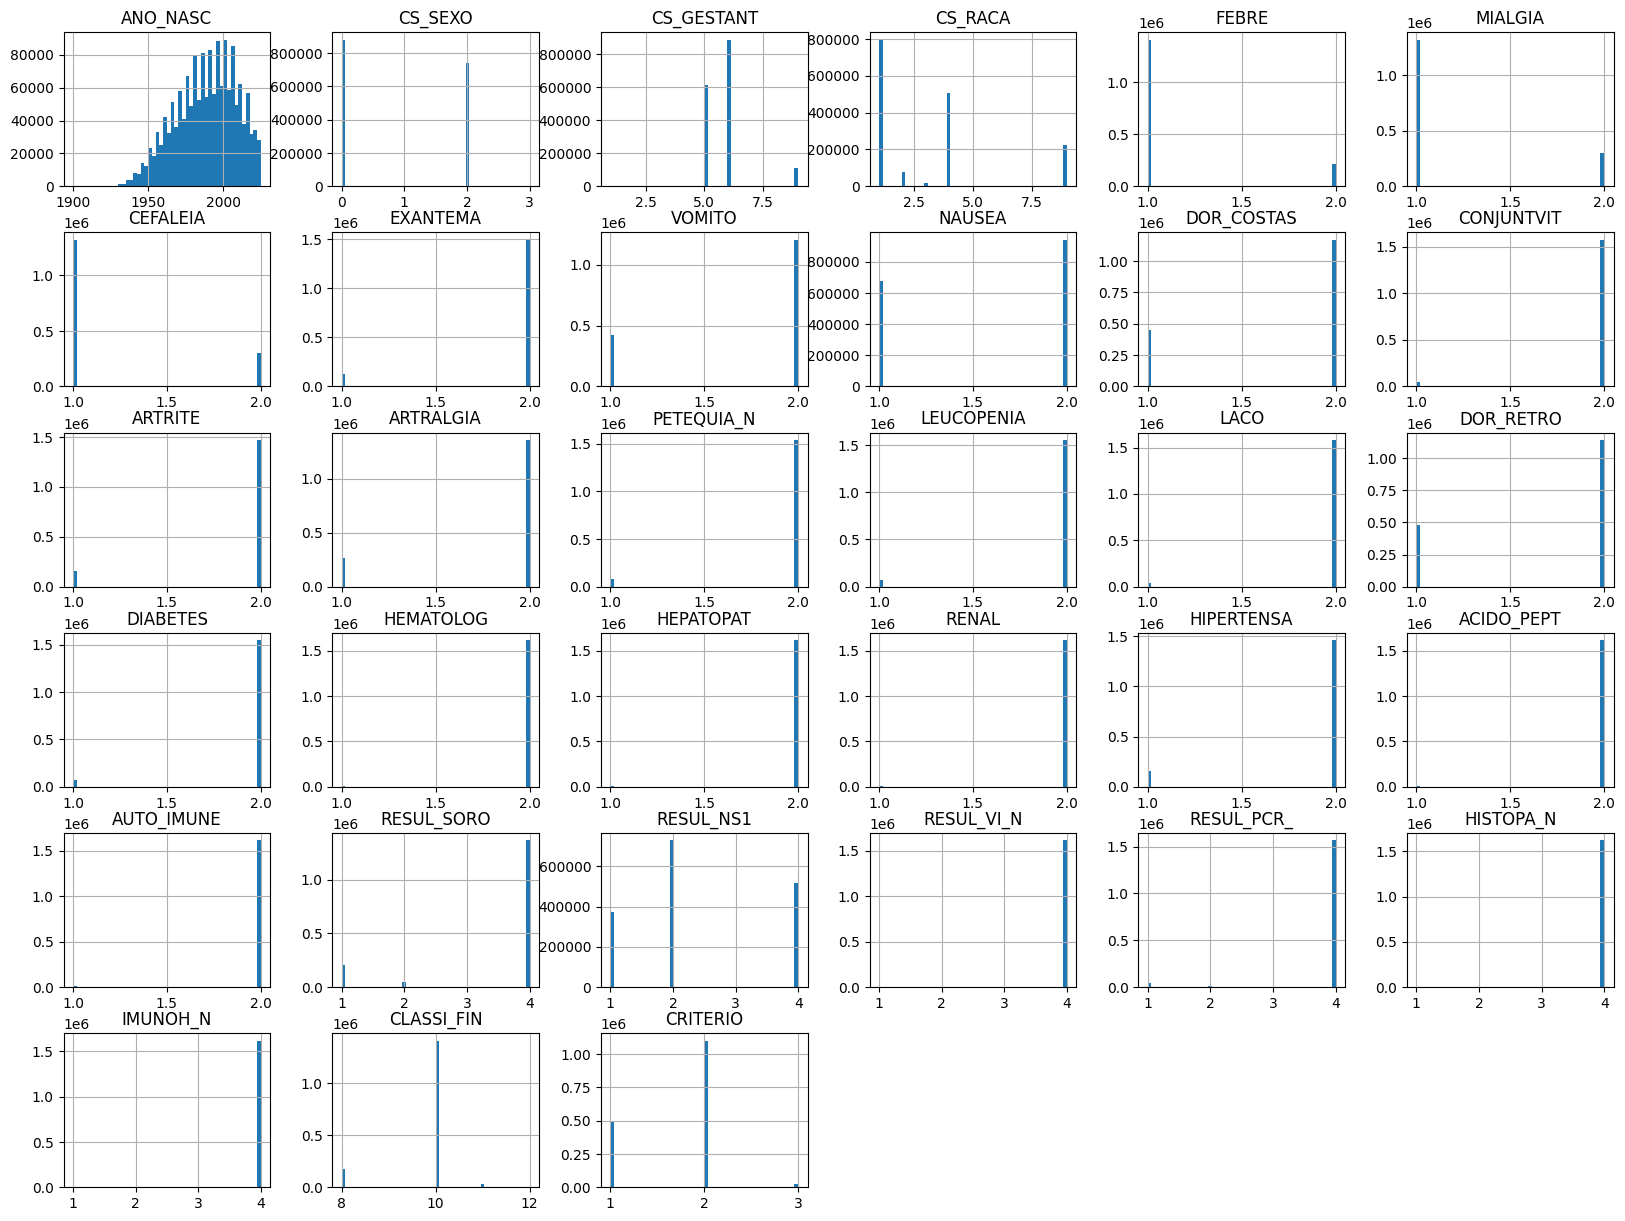

In [ ]:
# Histograma dos campos atualizados

df.hist(bins=50, figsize=(20,15))

In [ ]:
df['CLASSI_FIN'].value_counts()

CLASSI_FIN
10.0    1411976
8.0      174360
11.0      33523
12.0       2578
Name: count, dtype: int64

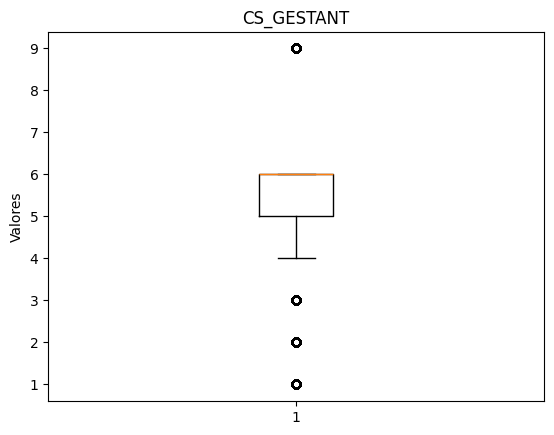

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot, mostrando a distribuição dos valores na coluna 'CS_GESTANT'
plt.boxplot(df['CS_GESTANT'])
plt.title('CS_GESTANT')
plt.ylabel('Valores')
plt.show()

In [ ]:
# Separando as variáveis preditoras (X) da variável alvo (y)
X = df.drop(columns=['CLASSI_FIN']) # Variáveis características
y = np.log1p(df['CLASSI_FIN']) # O que eu quero prever. (Target)

array([[<Axes: title={'center': 'ANO_NASC'}>,
        <Axes: title={'center': 'CS_SEXO'}>,
        <Axes: title={'center': 'CS_GESTANT'}>,
        <Axes: title={'center': 'CS_RACA'}>,
        <Axes: title={'center': 'FEBRE'}>,
        <Axes: title={'center': 'MIALGIA'}>],
       [<Axes: title={'center': 'CEFALEIA'}>,
        <Axes: title={'center': 'EXANTEMA'}>,
        <Axes: title={'center': 'VOMITO'}>,
        <Axes: title={'center': 'NAUSEA'}>,
        <Axes: title={'center': 'DOR_COSTAS'}>,
        <Axes: title={'center': 'CONJUNTVIT'}>],
       [<Axes: title={'center': 'ARTRITE'}>,
        <Axes: title={'center': 'ARTRALGIA'}>,
        <Axes: title={'center': 'PETEQUIA_N'}>,
        <Axes: title={'center': 'LEUCOPENIA'}>,
        <Axes: title={'center': 'LACO'}>,
        <Axes: title={'center': 'DOR_RETRO'}>],
       [<Axes: title={'center': 'DIABETES'}>,
        <Axes: title={'center': 'HEMATOLOG'}>,
        <Axes: title={'center': 'HEPATOPAT'}>,
        <Axes: title={'center': 

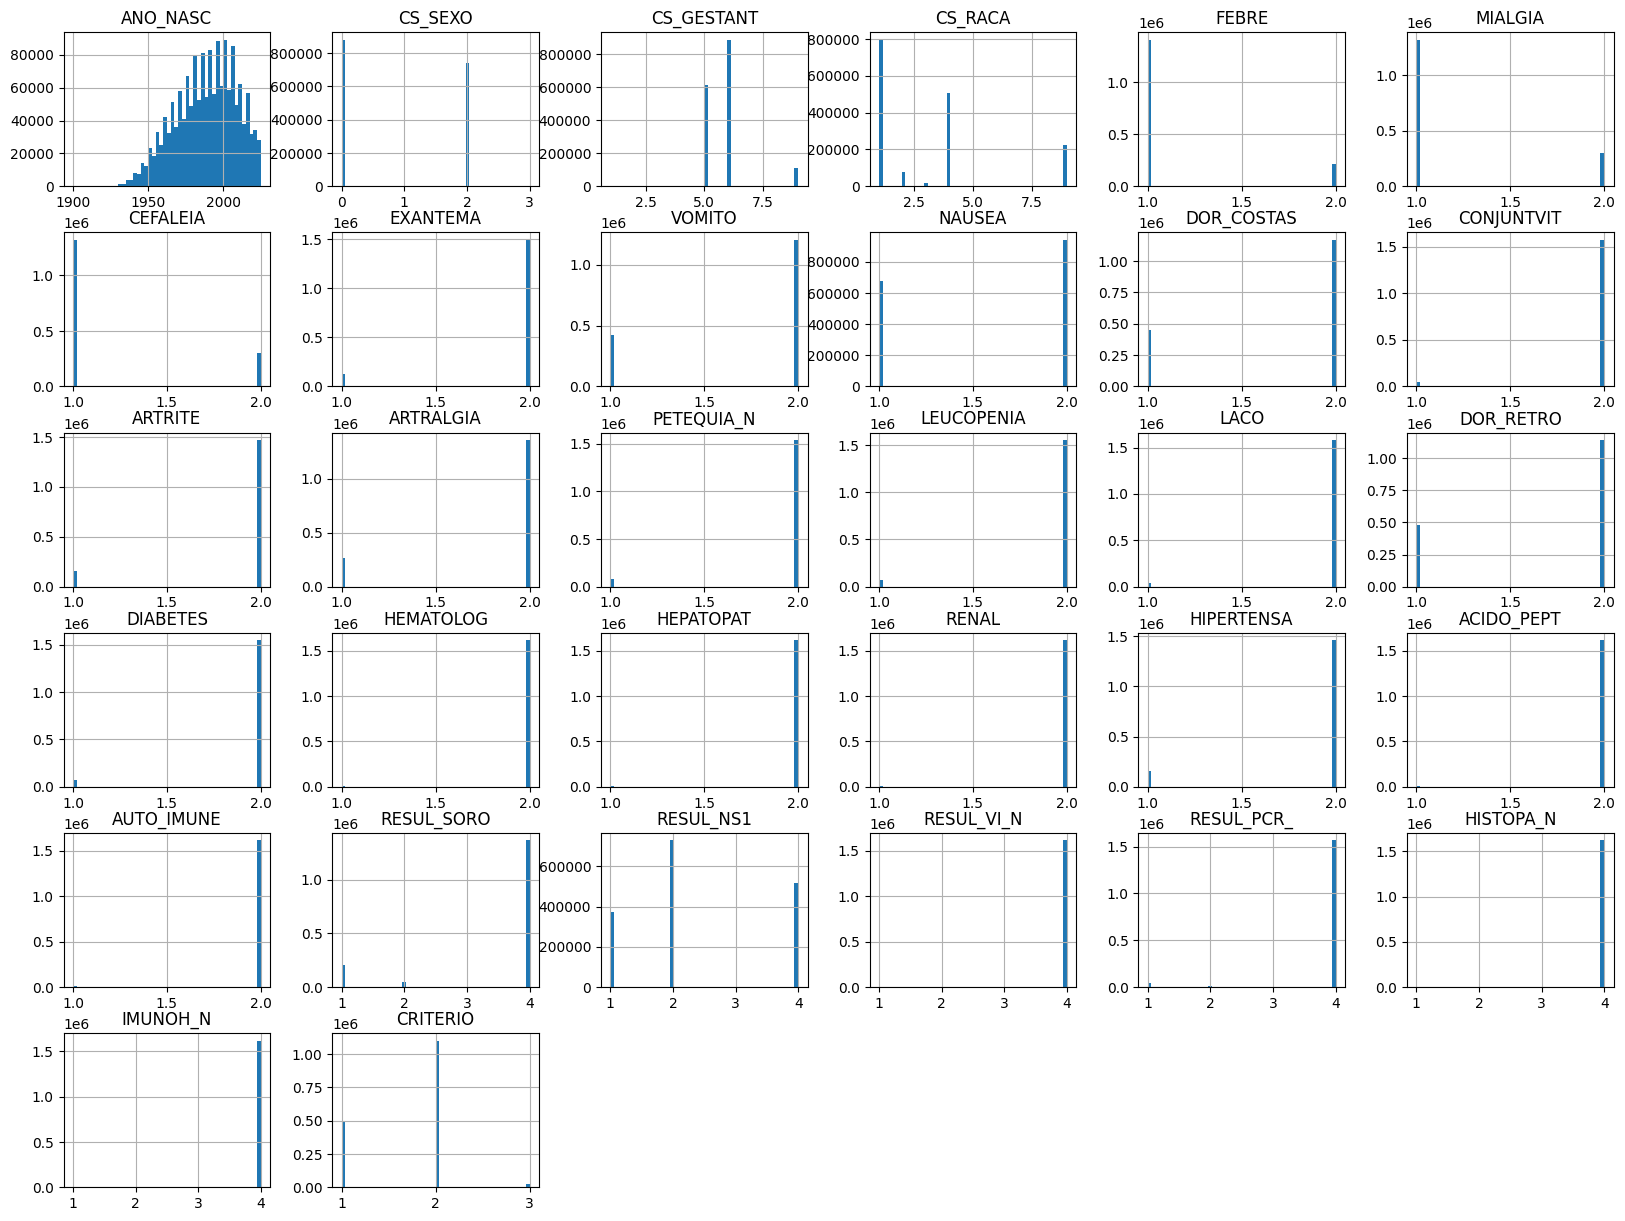

In [ ]:
X.hist(bins=50, figsize=(20,15))

Tamanho do conjunto de dados alvo: 1622437
Tamanho do conjunto de dados preditor: 1622437


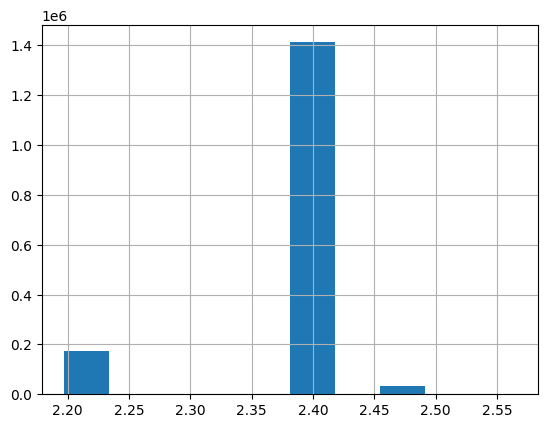

In [ ]:
y.hist()

print(f"Tamanho do conjunto de dados alvo: {len(y)}")
print(f"Tamanho do conjunto de dados preditor: {len(X)}")


In [ ]:
# Separando as bases em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train), "feature de treinamento +", len(X_test), "teste")

1297949 feature de treinamento + 324488 teste


In [ ]:
# Criando e treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression

regressaoLinear = LinearRegression()
regressaoLinear.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = regressaoLinear.predict(X_test)

In [ ]:
# Avaliando o desempenho do modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 0.0036250878068965035
MAE: 0.03883807462232541
R²: 0.12609870106193422


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressaoLinear = RandomForestRegressor()
regressaoLinear.fit(X_train, y_train)

previsoes = regressaoLinear.predict(X_test)

# Avaliando o desempenho do modelo

rmse = mean_squared_error(y_test, previsoes)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')